# Задание
1. Описать задачу словами
2. Прочитать данные
3. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и тд)
4. Обработать пропущенные значения
5. Провести нормализацию (или объяснить почему она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей(попробовать разное их количество). Попробовать другие классификаторы (по желанию)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы

# Описание задачи
Описание: Компания поделилась данными о годовом страховании автомобилей. Теперь нужно выяснить реальное поведение клиентов по данным.

Задача: предугадать по личным данным, кто возьмет страховку, а кто нет

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Загрузка и чтение данных

In [2]:
url = "https://raw.githubusercontent.com/ParanichevaAlyona/machine_learning/main/datasets/Car_Insurance_Claim.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(10000, 19)

Таблица содержит личную информацию о 10000 клиентах, разделенную на 19 категорий

In [4]:
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
data_raw.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


Каждый пассажир охарактеризован 18 признаками (номер клиента не является признаком). Среди них есть категориальные (пол, раса, опыт вождения, образование, социальное положение, год покупки автомобиля, тип автомобиля), числовые (возраст, кредитный рейтинг, количество своих автомобилей, семейное положение, количество детей, почтовый индекс, годовой пробег, превышения скорости,вождение в нетрезвом виде, количество аварий) и последний столбец содержит информацию взял ли человек страховку

Рассмотрим все категории:

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

 0   ID - порядковый номер клиента (числовой)  
 1   AGE - возраст клиента (категориальный)  
 2   GENDER - пол клиента (категориальный)  
 3   RACE - раса клиента (категориальный)  
 4   DRIVING_EXPERIENCE - опыт вождения (категориальный)  
 5   EDUCATION - образование (категориальный)  
 6   INCOME - социальный статус (категориальный)  
 7   CREDIT_SCORE - кредитный рейтинг (числовой)  
 8   VEHICLE_OWNERSHIP - количество автомобилей (числовой)  
 9   VEHICLE_YEAR - год приобретения автомобиля (категориальный)  
 10  MARRIED - семейное положение (числовой)  
 11  CHILDREN - количество детей (числовой)  
 12  POSTAL_CODE - почтовый индекс (числовой)  
 13  ANNUAL_MILEAGE - годовой пробег (числовой)  
 14  VEHICLE_TYPE - тип автомобиля (категориальный)  
 15  SPEEDING_VIOLATIONS - превышение скорости (числовой)  
 16  DUIS - вождение в нетрезвом виде (числовой)  
 17  PAST_ACCIDENTS - аварии (числовой)  
 18  OUTCOME - взятие ссуды (числовой)  

### Заменим тип Object категориальных признаков на специальный тип, который предназначен для хранения как раз таких категориальных значений:

In [7]:
# сделаем копию данных, для случая, если нам понадобится исходник
data = data_raw.copy()
# теперь творим все наши изменения
data_raw['AGE'] = data_raw['AGE'].astype('category')
data_raw['GENDER'] = data_raw['GENDER'].astype('category')
data_raw['RACE'] = data_raw['RACE'].astype('category')
data_raw['DRIVING_EXPERIENCE'] = data_raw['DRIVING_EXPERIENCE'].astype('category')
data_raw['EDUCATION'] = data_raw['EDUCATION'].astype('category')
data_raw['INCOME'] = data_raw['INCOME'].astype('category')
data_raw['VEHICLE_YEAR'] = data_raw['VEHICLE_YEAR'].astype('category')
data_raw['VEHICLE_TYPE'] = data_raw['VEHICLE_TYPE'].astype('category')

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

Проверим тип категориальных признаков, а также увидим, какие значения они могут принимать

In [9]:
data_raw['AGE'].dtype

CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False)

In [10]:
data_raw['GENDER'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [11]:
data_raw['RACE'].dtype

CategoricalDtype(categories=['majority', 'minority'], ordered=False)

In [12]:
data_raw['DRIVING_EXPERIENCE'].dtype

CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False)

In [13]:
data_raw['EDUCATION'].dtype

CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False)

In [14]:
data_raw['INCOME'].dtype

CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False)

In [15]:
data_raw['VEHICLE_YEAR'].dtype

CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False)

In [16]:
data_raw['VEHICLE_TYPE'].dtype

CategoricalDtype(categories=['sedan', 'sports car'], ordered=False)

Каких-то неожиданных значений нет, а это значит, что в категориальных признаках выбросов нет

### Теперь проверим числовые признаки на наличие выбросов

In [17]:
data_raw['CREDIT_SCORE'].value_counts()

0.617333    1
0.447405    1
0.788566    1
0.548152    1
0.608538    1
           ..
0.501158    1
0.665393    1
0.499761    1
0.553830    1
0.270302    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64

Визуализируем кредитный рейтинг с помощью графика, чтобы понять есть ли значения <0 и больше >0

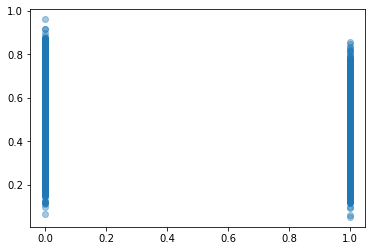

In [18]:
plt.scatter(data_raw['OUTCOME'], data_raw['CREDIT_SCORE'], alpha=0.4)
pass

Выходящих за рамки значений нет

In [19]:
data_raw['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [20]:
data_raw['MARRIED'].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [21]:
data_raw['CHILDREN'].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

In [22]:
data_raw['POSTAL_CODE'].value_counts()

10238    6940
32765    2456
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64

In [23]:
data_raw['ANNUAL_MILEAGE'].value_counts()

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
22000.0       2
2000.0        2
Name: ANNUAL_MILEAGE, dtype: int64

In [24]:
data_raw['SPEEDING_VIOLATIONS'].value_counts()

0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

In [25]:
data_raw['DUIS'].value_counts()

0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: DUIS, dtype: int64

In [26]:
data_raw['PAST_ACCIDENTS'].value_counts()

0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: PAST_ACCIDENTS, dtype: int64

In [27]:
data_raw['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

У числовых признаков выбросов также нет

# Визуализация и основные характеристики

Количественные признаки:

In [28]:
data_raw.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


В описании видим:

count - количество значений для каждого признака. Из-за пропусков в таблице все значения различны.
mean - среднее значение  
std - стандартное отклонение  
min - минимальное значение  
25% - первый квартиль  
50% - медиана  
75% - третий квартиль  
max - максимальное значение  

Категориальные признаки:

In [29]:
data_raw.describe(exclude=[np.number])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Вычислим матрицу корреляции

In [30]:
corr_matrix = data.corr()
corr_matrix

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


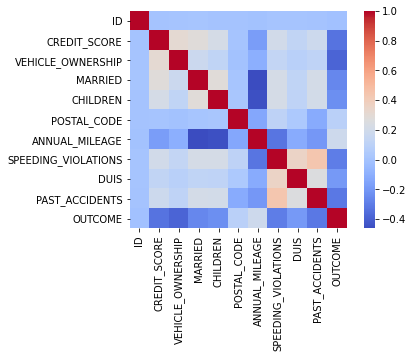

In [31]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

По визуализации матрицы корреляции можно легко заметить, какие признаки взаимосвязаны

In [32]:
corr_matrix >= 0.3

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,True,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,True,True,False,False,False,False,False,False,False,False
VEHICLE_OWNERSHIP,False,True,True,False,False,False,False,False,False,False,False
MARRIED,False,False,False,True,False,False,False,False,False,False,False
CHILDREN,False,False,False,False,True,False,False,False,False,False,False
POSTAL_CODE,False,False,False,False,False,True,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,False,False,False,True,False,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,False,True,True,True,False
DUIS,False,False,False,False,False,False,False,True,True,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,True,False,True,False


Положительная корреляция показывает взаимосвязь пропорционального возрастания величин.  
Можно заметить небольшую зависимость между кредитным рейтингом и фактом владением машины: с повышением кредитного рейтинга повышается факт наличия автомобиля. Можно предположить здесь такую взаимосвязь: платежеспособность человека определяет его кредитный рейтинг, так как машина дорогое приобретение, то платежеспособность человека должна быть высокой, а соответсвенно и высоким должен быть кредитный рейтинг.  
Так же видна взаимосвязь между пунктами об авариях, превышении скорости и вождении в нетрезвом виде. Здесь все очевидно: вождение в нетрезвом виде и превышение скорости порождают аварии.  

In [33]:
corr_matrix <= -0.3

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,False,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,False,False,False,False,False,False,False,False,False,True
VEHICLE_OWNERSHIP,False,False,False,False,False,False,False,False,False,False,True
MARRIED,False,False,False,False,False,False,True,False,False,False,False
CHILDREN,False,False,False,False,False,False,True,False,False,False,False
POSTAL_CODE,False,False,False,False,False,False,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,True,True,False,False,True,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,True,False,False,False,False
DUIS,False,False,False,False,False,False,False,False,False,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,False,False,False,True


Отрицательная корреляция показывает взаимосвязь тех величин, где за счет возрастания одной величины, убывает другая.  
Отрицательная корреляция между признаками количества аварий и получением страховки понятна: страховая компания откажет в получении страховки лицу, который часто попадает в ДТП, ей это просто невыгодно.  

Выведем некоторые интересующие нас пары признаков для визуализации их связи:

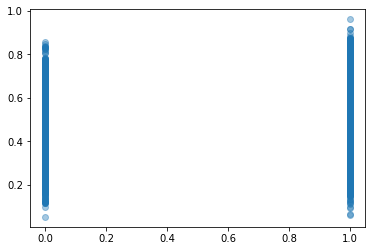

In [34]:
plt.scatter(data_raw['VEHICLE_OWNERSHIP'], data_raw['CREDIT_SCORE'], alpha=0.4)
pass

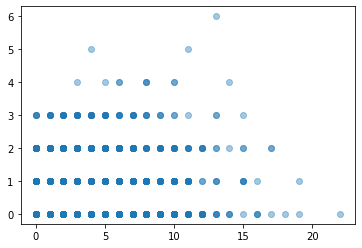

In [35]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['DUIS'], alpha=0.4)
pass

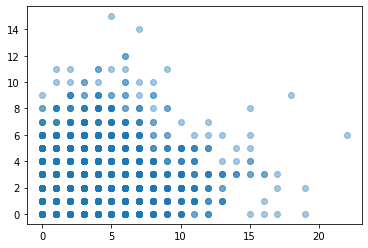

In [36]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['PAST_ACCIDENTS'], alpha=0.4)
pass

Теперь проанализируем какие возрастные категории водят машину, а значит пользуются страховкой

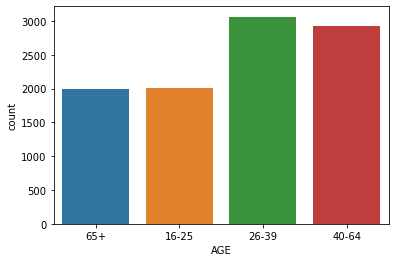

In [37]:
sns.countplot(x='AGE', data=data)
pass

Больше всего водителей среди таких возрастных категорий, как 26-39 и 40-64, что неудивительно

Увидим каким типом машина предпочитают пользоваться потребители

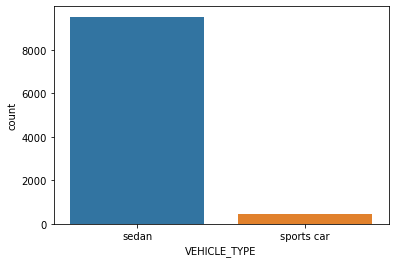

In [38]:
sns.countplot(x='VEHICLE_TYPE', data=data)
pass

Число пользователей седанов значительно выше пользователей спортивных машин, так как спортивные машины значительно дороже седанов

А теперь посмотрим сколько клиентов владеют автомобилями

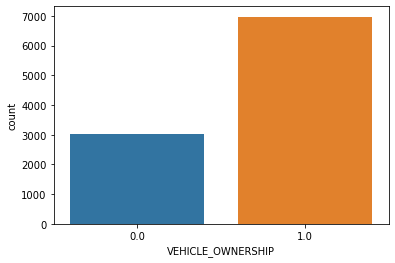

In [39]:
sns.countplot(x='VEHICLE_OWNERSHIP', data=data)
pass

Людей, владеющих автомобилем, примерно в два раза больше людей, невладеющих автомобилем

# Обработка пропущенных значений

Выведем столбцы с пустотами и их количество

In [40]:
data_raw.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Пропущенных значений довольно много, поэтому заполним все пустоты

In [41]:
# заполнение медианой пустот количественных признаков
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

Проверим остались ли еще пустоты

In [42]:
data_raw.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Пустот не осталось

# Нормализация признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых признаков.

Можем бинаризовать некоторые признаки.  
Бинаризация коснется: гендера, рассовой принадлежности (большинство/меньшинство), год автомобиля (до 2015/после 2015), тип автомобиля(седан/спортивный)

In [43]:
# бинаризация гендера
data_raw['GENDER'] = pd.factorize(data_raw['GENDER'])[0]
# бинаризация рассовой принадлежности
data_raw['RACE'] = pd.factorize(data_raw['RACE'])[0]
# бинаризация года покупки автомобиля
data_raw['VEHICLE_YEAR'] = pd.factorize(data_raw['VEHICLE_YEAR'])[0]
# бинаризация типа автомобиля
data_raw['VEHICLE_TYPE'] = pd.factorize(data_raw['VEHICLE_TYPE'])[0]
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,0,0,0-9y,high school,upper class,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,16-25,1,0,0-9y,none,poverty,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,16-25,0,0,0-9y,high school,working class,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,16-25,1,0,0-9y,university,working class,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,26-39,1,0,10-19y,none,working class,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


Осталось обработать те категориальные признаки, где значений больше двух.  Такую бинаризацию можно выполнить с помощью функции get_dummies:

In [44]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(10000, 30)


,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,569520,0,0,0.629027,1.0,0,0.0,1.0,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,0.0,1,0.0,0.0,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,1.0,1,0.0,0.0,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,1.0,1,0.0,1.0,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,1.0,1,0.0,0.0,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


Теперь нормализуем количественные признаки, приведя значения к отрезку [0,1]

In [45]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500483,0.499000,0.098800,0.510612,0.697000,0.696700,0.498200,0.688800,0.117593,0.486300,...,0.3299,0.211900,0.105200,0.415700,0.191500,0.392800,0.213800,0.181400,0.433600,0.171200
std,0.290067,0.500024,0.298408,0.144117,0.459578,0.459707,0.500022,0.463008,0.231064,0.134082,...,0.4702,0.408675,0.306826,0.492867,0.393501,0.488397,0.410008,0.385369,0.495596,0.376702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249569,0.000000,0.000000,0.416714,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501739,0.000000,0.000000,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753968,1.000000,0.000000,0.610769,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,...,1.0000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Выбор обучающей и тестовой выборки

Для прогноза будем использовать все категории, кроме ID (и конечно самого прогноза)

In [46]:
X = data_normal.drop (['ID', 'OUTCOME'], axis=1) 
y = data_raw['OUTCOME']

Разобьем данные на обучающую (75%) и тестовую (25%) выборки:

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(7500, 2500)

# Обучение с помощью классификатора ближайших соседей

Используем функцию с параметрами по умолчанию

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 87.08%, Test: 80.00%. 


Ошибки на обучающей выборке составили ~13%, а на тестовой 20%  
Попробуем увеличить число соседей до 7

In [49]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)
knn_train_pred = 100 * knn_7.score(X_train, y_train)
knn_test_pred = 100 * knn_7.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 85.63%, Test: 81.52%. 


Точность на обучающей выборке сократилась, зато на тестовой выборке повысилась

In [50]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_train_pred = 100 * knn_3.score(X_train, y_train)
knn_test_pred = 100 * knn_3.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 88.85%, Test: 79.88%. 


Теперь точность на обучающей выборке возросла, зато на тестовой сократилась.

# Обучение с помощью дерева решений

In [51]:
from sklearn.tree import DecisionTreeClassifier
desTrCl = DecisionTreeClassifier()
desTrCl.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl.score(X_train, y_train)
print ('Depth:', desTrCl.get_depth())
print ('Leaves:', desTrCl.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 26
Leaves: 1268
Accuracy. Train : 99.97%, Test: 79.16%. 


Точность на обучающей выборке сильно разнится с точностью на тестовой.  
Теперь попробуем уменьшить глубину до 6

In [52]:
desTrCl_6 = DecisionTreeClassifier(max_depth=6)
desTrCl_6.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_6.score(X_train, y_train)
print ('Depth:', desTrCl_6.get_depth())
print ('Leaves:', desTrCl_6.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_6.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 6
Leaves: 58
Accuracy. Train : 85.68%, Test: 85.04%. 


Точность на обучающей выборке понизилась, зато на тестовой выборке повысилась. Теперь точность примерно одинаковая и точность в 85% на тестовой выборке самая высокая среди всех наших экспериментов.

# Выводы

В работе производился анализ данных клиентов страховой компании и решение задачи классификации с помощью моделей, которые были натренированы методами К-ближайших соседей и дерева решений.  
В ходе работы проведены:  
1. Загрузка и чтение данных
2. Вычисление основных статистических характеристик и их анализ
3. Обработка пропущенных значений (их заполнение)  
4. Нормализация категориальных признаков (с помощью бинаризации и функции get_dummies())  
5. Нормализация количественных признаков (с помощью линейного преобразования к отрезку [0,1])  
6. Разбиение данных на обучающую и тестовую выборки  
7. Выбор алгоритма классификации и проверка качества модели: алгоритм дерева решений на тестовой выборке оказался немного лучше метода к-ближайших соседей.